# INVERSE MATRIX METHOD FOR LINEAR REGRESSION

$$ Ax = b $$  General form for the linear regression problem.. A matrix is not neccesary a squared matrix, so we need to apply a Transponse method to determine x -->
$$A^TAx = A^Tb $$

$$x = (A^TA)^{-1}A^Tb $$

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
session = tf.Session()

In [8]:
x_vals = np.linspace(0,10,100)
y_vals = x_vals + np.random.normal(0,1,100)  #Adding normal noise

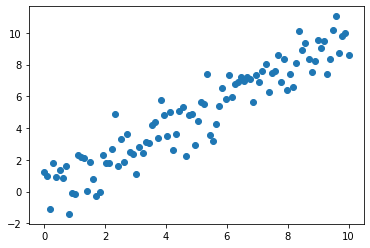

In [10]:
plt.plot(x_vals, y_vals, 'o', label = 'Datos')
plt.show()

In [12]:
x_vals_column = np.transpose(np.matrix(x_vals))    #Creating the necesary matrix to operate the regression
ones_column = np.transpose(np.matrix(np.repeat(1,100)))
A = np.column_stack((x_vals_column, ones_column))
b = np.transpose(np.matrix(y_vals))

In [14]:
A_tensor = tf.constant(A)     #Convert matrix to tensor to operate with TF
b_tensor = tf.constant(b)

In [17]:
tA_A = tf.matmul(tf.transpose(A_tensor), A)   #Inverse matrix solver
tA_A_inv = tf.matrix_inverse(tA_A)
product = tf.matmul(tA_A_inv, tf.transpose(A_tensor))
solution = tf.matmul(product, b_tensor)

solution_eval = session.run(solution)

In [24]:
slope = solution_eval[0][0]        #Determine slope and intercept point then print the final regression eq.
intercept = solution_eval[1][0]
print('Linear regression equation = ', str(np.round(slope, 3)) + ' x + ' + str(np.round(intercept, 3)))

Linear regression equation =  0.98 x + 0.002


## Fit regression model to the data

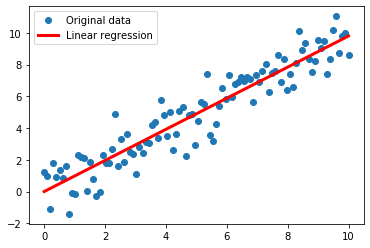

In [29]:
best_fit = []    
for i in x_vals:
    best_fit.append(slope*i + intercept)
    
plt.plot(x_vals, y_vals, 'o', label = 'Original data')
plt.plot(x_vals, best_fit, 'r-', label = 'Linear regression', linewidth = 3)
plt.legend(loc = 'upper left')
plt.show()